# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [8]:
!pip install seaborn

You should consider upgrading via the 'c:\users\ivan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [30]:
df = pd.read_csv('adult_data.csv', delimiter = ", ")
df.head()

c:\users\admin\pycharmprojects\iadh\venv\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [31]:
# Ваш код здесь
df.shape[0]
print("The number of observations: " + str(df.shape[0]))
print("The number of features: " + str(df.shape[1]))

The number of observations: 32561
The number of features: 15


**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [32]:
print('\n'.join(df.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [33]:
sum = 0
labels = list()
buf_data = pd.DataFrame(columns=list(df.columns))
buf_data = df
for column in df.columns:
    if df.loc[df[column] == '?'].shape[0] != 0:
        sum += df.loc[df[column] == '?'].shape[0]
        labels.append(column)
        buf_data = buf_data.loc[buf_data[column] != '?']

print(labels)
print(sum)
print(buf_data.shape[0])
print(df.shape[0])

['workclass', 'occupation', 'native-country']
4262
30162
32561


**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [34]:
df = buf_data
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Для категориальных признаков выведите список категорий**

In [35]:
categories = dict()
for column in buf_data.columns:
    if buf_data[column].dtypes == 'object':
        categories[column] = list(set(buf_data[column].values))
print(categories)
        

{'workclass': ['Private', 'Self-emp-inc', 'Without-pay', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov', 'State-gov'], 'education': ['5th-6th', 'Preschool', 'Bachelors', 'Assoc-acdm', 'Masters', '12th', 'Assoc-voc', 'Prof-school', '1st-4th', '7th-8th', '10th', '9th', 'Some-college', 'Doctorate', 'HS-grad', '11th'], 'marital-status': ['Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Widowed', 'Never-married', 'Divorced', 'Married-civ-spouse'], 'occupation': ['Prof-specialty', 'Adm-clerical', 'Protective-serv', 'Sales', 'Exec-managerial', 'Armed-Forces', 'Craft-repair', 'Handlers-cleaners', 'Other-service', 'Transport-moving', 'Farming-fishing', 'Priv-house-serv', 'Tech-support', 'Machine-op-inspct'], 'relationship': ['Husband', 'Unmarried', 'Not-in-family', 'Wife', 'Other-relative', 'Own-child'], 'race': ['Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'White', 'Other'], 'sex': ['Female', 'Male'], 'native-country': ['Hong', 'Honduras', 'Ecuador', 'China', 'Hungary', 'Nic

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [36]:
print(df.loc[df['sex'] == 'Male'].shape[0])
print(df.loc[df['sex'] == 'Female'].shape[0])

20380
9782


**2. Каков средний возраст (признак *age*) женщин?**

In [37]:
df.loc[df['sex'] == 'Female'].age.mean()

36.8834594152525

**3. Какова доля граждан Германии (признак *native-country*)?**

In [38]:
df.loc[df['native-country'] == 'Germany'].shape[0] / df.shape[0] * 100

0.4243750414428751

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

<AxesSubplot:>

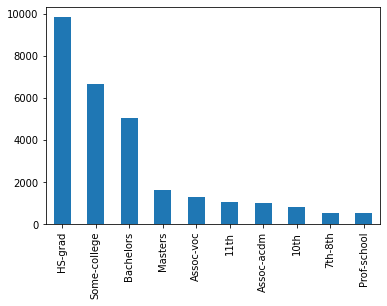

In [39]:
edu = df['education'].value_counts().head(10)
edu.plot.bar()

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [40]:
print("Mean value:")
print(df.groupby(['salary'])['age'].mean())
print("STD:")
print(df.groupby(['salary'])['hours-per-week'].std())

Mean value:
salary
<=50K    36.60806
>50K     43.95911
Name: age, dtype: float64
STD:
salary
<=50K    11.950774
>50K     10.736987
Name: hours-per-week, dtype: float64


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [41]:
high_ed = ['Assoc-voc', 'Prof-school', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate']
print(df.loc[(~df['education'].isin(high_ed)) & (df['salary'] == '>50K')].shape[0] == 0)

False


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [49]:
age_stat = df.groupby(['race', 'sex'])['age'].describe()
age_stat = pd.DataFrame(age_stat)
age_stat



count       mean        std   min    25%   50%  \
race               sex                                                        
Amer-Indian-Eskimo Female    107.0  37.252336  12.933862  17.0  28.00  37.0   
                   Male      179.0  36.430168  10.802589  17.0  28.00  35.0   
Asian-Pac-Islander Female    294.0  35.363946  11.819758  17.0  25.25  34.0   
                   Male      601.0  39.156406  12.772451  18.0  29.00  37.0   
Black              Female   1399.0  38.042888  12.320976  17.0  28.00  37.0   
                   Male     1418.0  37.681241  12.516296  17.0  28.00  36.0   
Other              Female     87.0  31.908046  10.216986  17.0  24.00  29.0   
                   Male      144.0  34.625000  11.280204  17.0  26.00  32.0   
White              Female   7895.0  36.784421  13.814467  17.0  25.00  35.0   
                   Male    18038.0  39.366781  12.918661  17.0  29.00  38.0   

                            75%   max  
race               sex                 
Amer-Indian-Eskimo Female  46.0  80.0  
                   Male    44.0  71.0  
Asian-Pac-Islander Female  44.0  75.0  
                   Male    47.0  90.0  
Black              Female  46.0  90.0  
                   Male    46.0  90.0  
Other              Female  39.5  58.0  
                   Male    42.0  77.0  
White              Female  46.0  90.0  
                   Male    48.0  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [43]:
stat = categories['marital-status']
marr_stat = [married for married in stat if 'Married' in married]
married_count = df.loc[(df['marital-status'].isin(marr_stat) & (df['salary'] == '>50K'))].shape[0]
married_perc = married_count / df.loc[df['salary'] == '>50K'].shape[0]
print("Married: ", married_perc * 100)
print("Not Married: ", (1 - married_perc) * 100)

Married:  85.77517314864144
Not Married:  14.224826851358552


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [44]:
max_hour = df['hours-per-week'].describe()['max']
num_max_workers = df.loc[df['hours-per-week'] == max_hour].shape[0]
much_payed_workers = df.loc[ (df['hours-per-week'] == max_hour) & (df['salary'] == '>50K')].shape[0]
print(max_hour)
print(num_max_workers)
print((much_payed_workers / num_max_workers) * 100, '%' )

99.0
78
32.05128205128205 %


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

In [59]:
ctab = pd.crosstab(index=df['native-country'], columns=df['salary'], values=df['hours-per-'])

native-country
Cambodia                      41.545455
Canada                        38.704225
China                         38.541667
Columbia                      39.259259
Cuba                          38.716418
Dominican-Republic            42.138462
Ecuador                       38.739130
El-Salvador                   36.208791
England                       41.375000
France                        42.866667
Germany                       40.071429
Greece                        41.809524
Guatemala                     39.350000
Haiti                         36.578947
Holand-Netherlands            40.000000
Honduras                      35.909091
Hong                          39.076923
Hungary                       31.300000
India                         38.233333
Iran                          41.500000
Ireland                       40.947368
Italy                         40.363636
Jamaica                       38.214286
Japan                         41.333333
Laos                     

Я считаю, что...
- Пункт 1
- Пункт 2
    - Подпункт 1
    - Подпункт 2
    
[Статья](https://arxiv.org/pdf/2011.08036.pdf)

Текст $E=mc^2$ ещё *текст* $*$

###### Заголовок